Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


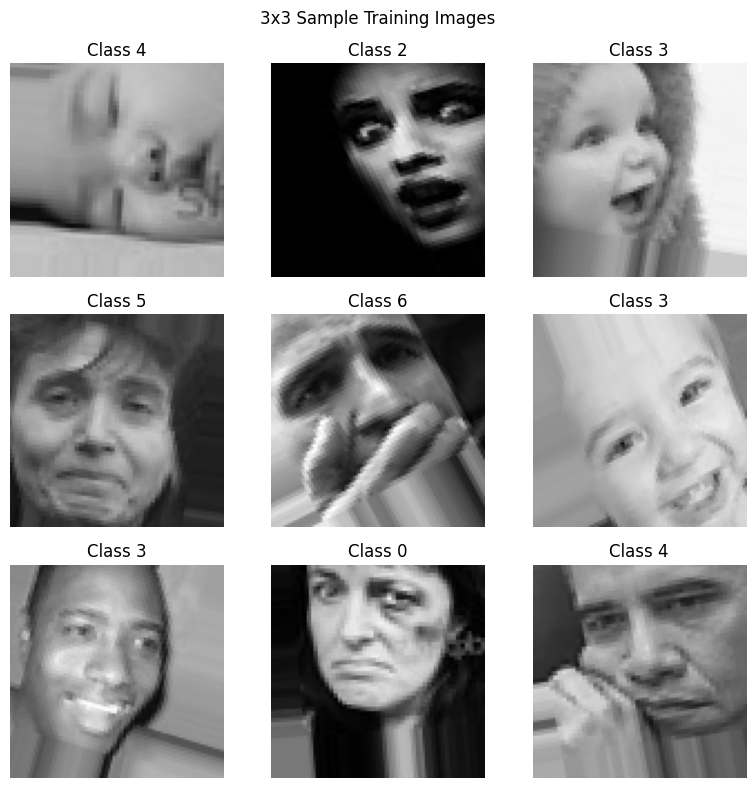

Sample image array values:
[[[[0.6039216  0.6039216  0.6039216 ]
   [0.6039216  0.6039216  0.6039216 ]
   [0.6039216  0.6039216  0.6039216 ]
   ...
   [0.6547646  0.6547646  0.6547646 ]
   [0.654902   0.654902   0.654902  ]
   [0.64350724 0.64350724 0.64350724]]

  [[0.5905087  0.5905087  0.5905087 ]
   [0.5958363  0.5958363  0.5958363 ]
   [0.6011638  0.6011638  0.6011638 ]
   ...
   [0.654902   0.654902   0.654902  ]
   [0.654902   0.654902   0.654902  ]
   [0.6485283  0.6485283  0.6485283 ]]

  [[0.49803925 0.49803925 0.49803925]
   [0.49803925 0.49803925 0.49803925]
   [0.49943662 0.49943662 0.49943662]
   ...
   [0.6517016  0.6517016  0.6517016 ]
   [0.6520962  0.6520962  0.6520962 ]
   [0.64567465 0.64567465 0.64567465]]

  ...

  [[0.75294125 0.75294125 0.75294125]
   [0.75294125 0.75294125 0.75294125]
   [0.75294125 0.75294125 0.75294125]
   ...
   [0.71971077 0.71971077 0.71971077]
   [0.7137255  0.7137255  0.7137255 ]
   [0.7137013  0.7137013  0.7137013 ]]

  [[0.75294125 0.7

C:\Users\Asit\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Asit\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 156s 171ms/step - accuracy: 0.2166 - loss: 2.1003 - val_accuracy: 0.2782 - val_loss: 1.7569 - learning_rate: 1.0000e-04
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 150s 166ms/step - accuracy: 0.2479 - loss: 1.8187 - val_accuracy: 0.2778 - val_loss: 1.7318 - learning_rate: 1.0000e-04
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 147s 163ms/step - accuracy: 0.2526 - loss: 1.7922 - val_accuracy: 0.3024 - val_loss: 1.7441 - learning_rate: 1.0000e-04
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 1540s 2s/step - accuracy: 0.2742 - loss: 1.7695 - val_accuracy: 0.3511 - val_loss: 1.6457 - learning_rate: 1.0000e-04
Epoch 5/30
212/901 ━━━━━━━━━━━━━━━━━━━━ 2:40 232ms/step - accuracy: 0.2869 - loss: 1.7610

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt

# Data directories
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(96, 96),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(96, 96),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Display 3x3 sample images from train generator
images, labels = next(train_generator)

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f'Class {np.argmax(labels[i])}')
    plt.axis('off')
plt.suptitle('3x3 Sample Training Images')
plt.tight_layout()
plt.show()

# Show array values for sample images
print("Sample image array values:")
print(images[:5])

# Build custom CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

# Compile model with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train the model
model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[early_stop, lr_scheduler]
)

# Evaluate final model
loss, accuracy = model.evaluate(test_generator)
print(f"Final Test Accuracy: {accuracy:.4f}")
